In [1]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/SEQ"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
import sys, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
sys.path.insert(0, "%s/lib"%workdir)

In [4]:
#sys.path

In [5]:
import get_I_tof
reload(get_I_tof)

<module 'get_I_tof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_I_tof.pyc'>

In [73]:
import get_difc_from_Itof
reload(get_difc_from_Itof)

<module 'get_difc_from_Itof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.pyc'>

In [129]:
import align
reload(align)
import align_utils
reload(align_utils)

<module 'align_utils' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/align_utils.py'>

In [8]:
pack = 'C25T/eightpack-top'
packname, packtype = pack.split('/')

# C60

In [11]:
# np.load('Si-I_tof/I_tof-xbb.npy')

In [9]:
ls C60-I_tof/*{packname}*

C60-I_tof/I_tof-y-C25T.npy  C60-I_tof/pack-C25T.yaml


In [10]:
cat C60-I_tof/pack-{packname}.yaml

pixelIDs:
  first: 100352
  last: 101375


<IPython.core.display.Javascript object>


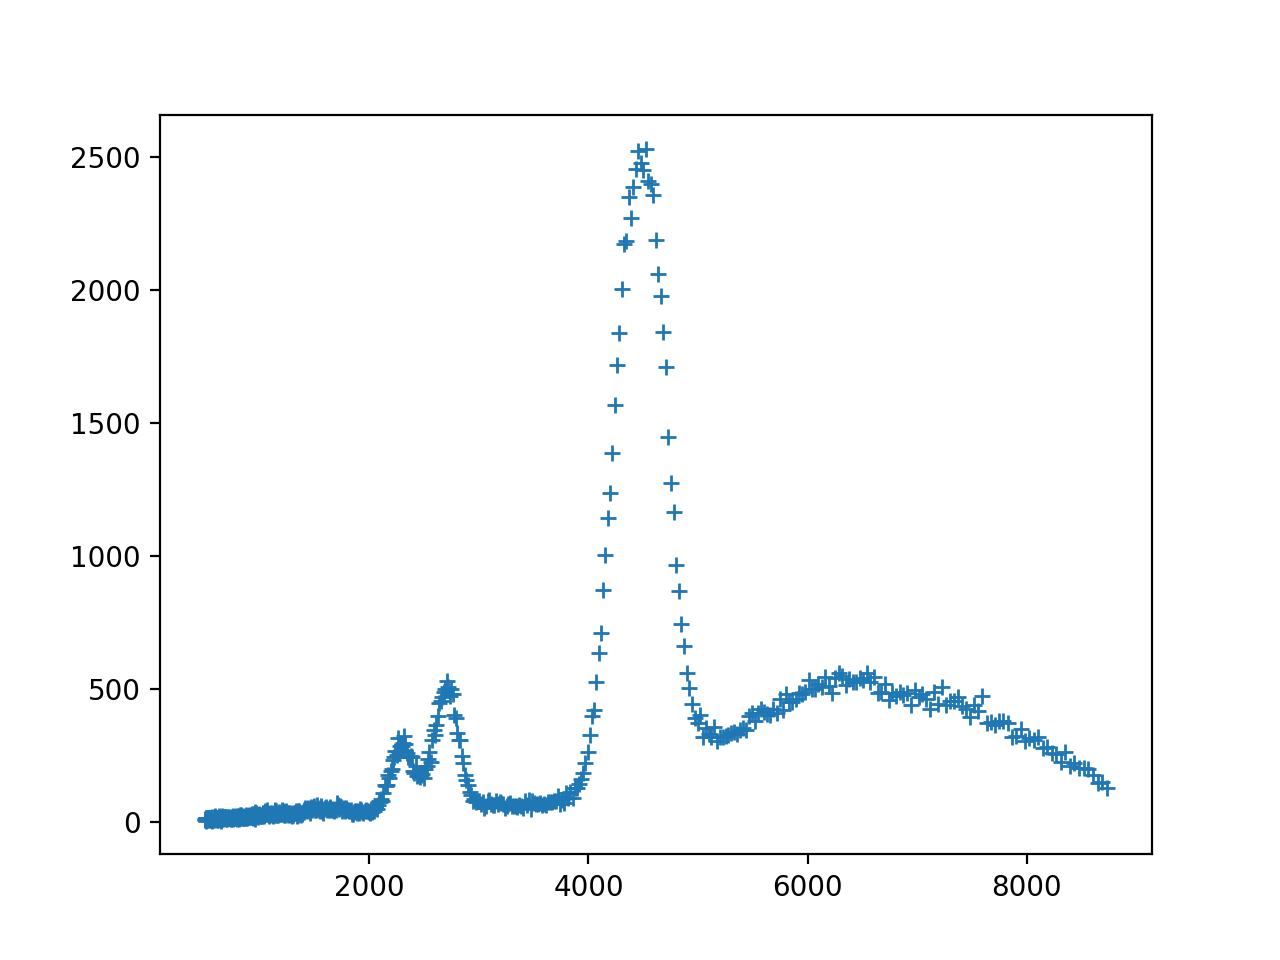

In [11]:
xbb = np.load('C60-I_tof/I_tof-xbb.npy')
x = (xbb[:-1] + xbb[1:])/2
ypack = np.load('C60-I_tof/I_tof-y-%s.npy' % packname)
plt.figure()
plt.plot(x, ypack[60], '+')

## Obtain difc

In [49]:
fitter = get_difc_from_Itof.Fitter(
    peak_fractional_width=0.05, bg_type='linear', curve_fit_options=dict(maxfev=1000), t0_range=(0, 100))
dvalues = [2.72509327, 2.89039789, 3.16627225, 3.24852679, 4.26940063, 5.00631601, 7.08,  8.17527981]
dmin=2.5; dmax=10

In [56]:
I_tof_dir = 'C60-I_tof'

gpd = get_difc_from_Itof.GetPackDifc(
    pack=packname,
    dvalues=dvalues,
    dmin=dmin, dmax=dmax,
    I_tof_dir = I_tof_dir,
    fitter=fitter,
    maxchisq = 100.,
    min_counts = 50000)

* tof range: 2083.33333333 8333.33333333


7.66224394485
531.508985522 547.261799891 2.24900726511e-12


<IPython.core.display.Javascript object>


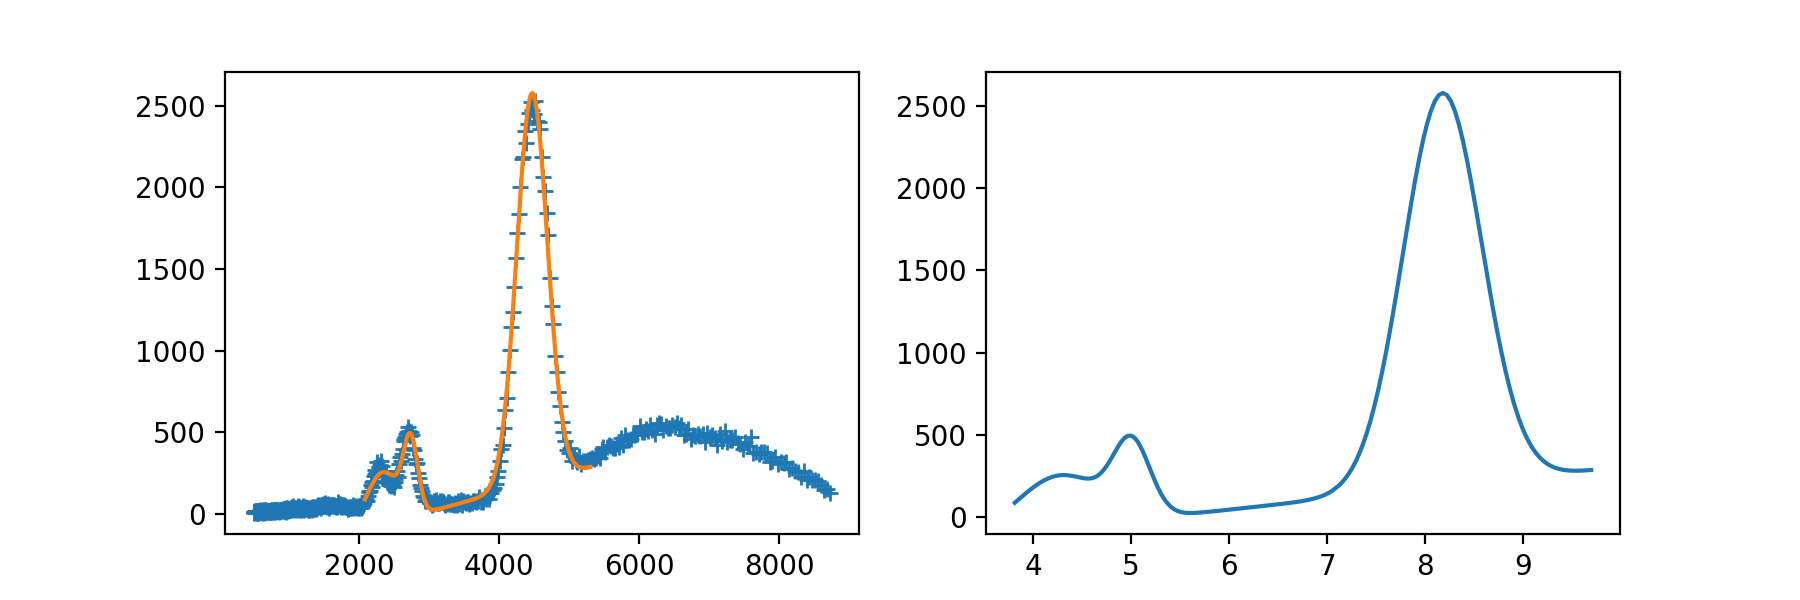

CPU times: user 301 ms, sys: 31.3 ms, total: 332 ms
Wall time: 307 ms


In [58]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(60)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

53.3090986417
620.493746592 639.10855899 68.944443711


<IPython.core.display.Javascript object>


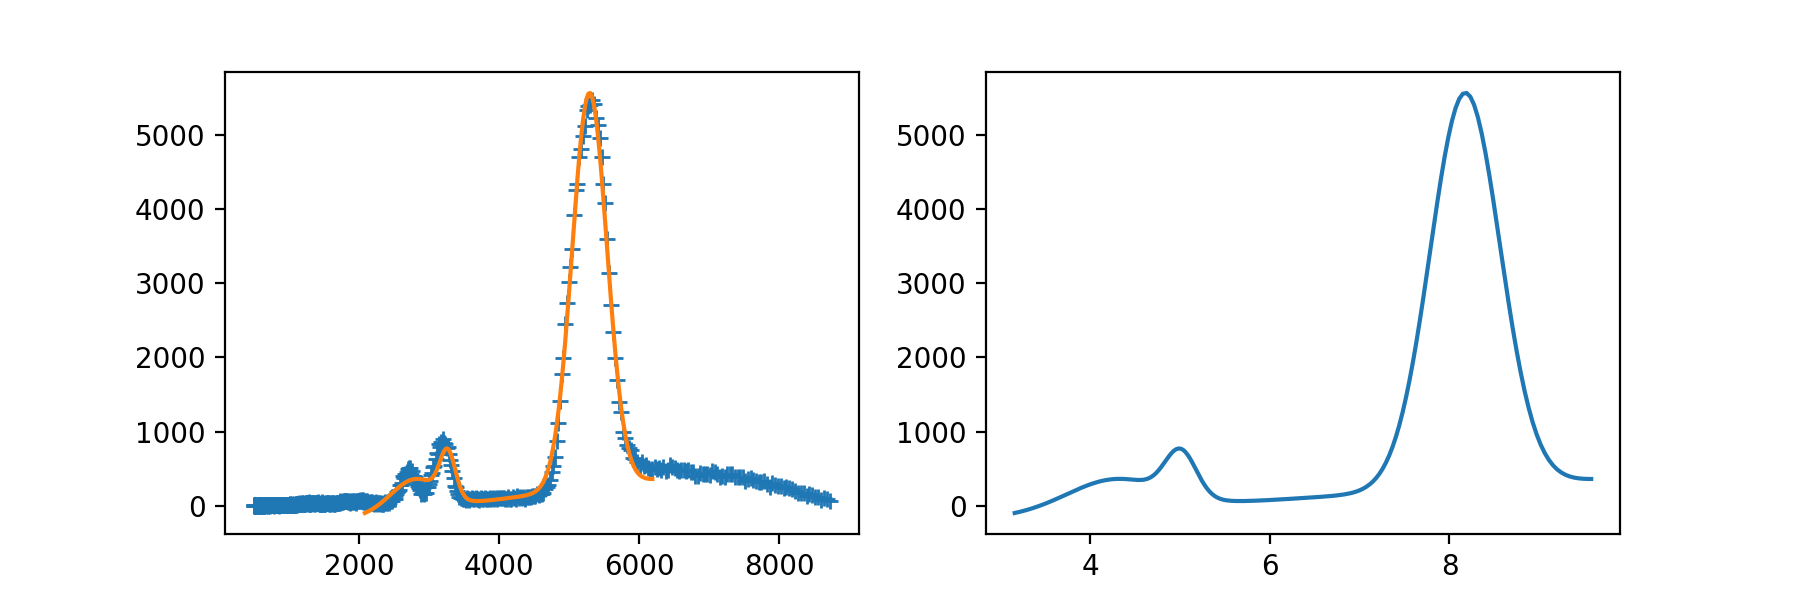

CPU times: user 412 ms, sys: 151 ms, total: 563 ms
Wall time: 535 ms


In [54]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(100)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

8.16255009063
466.036111246 471.909589674 5.01301649297e-09


<IPython.core.display.Javascript object>


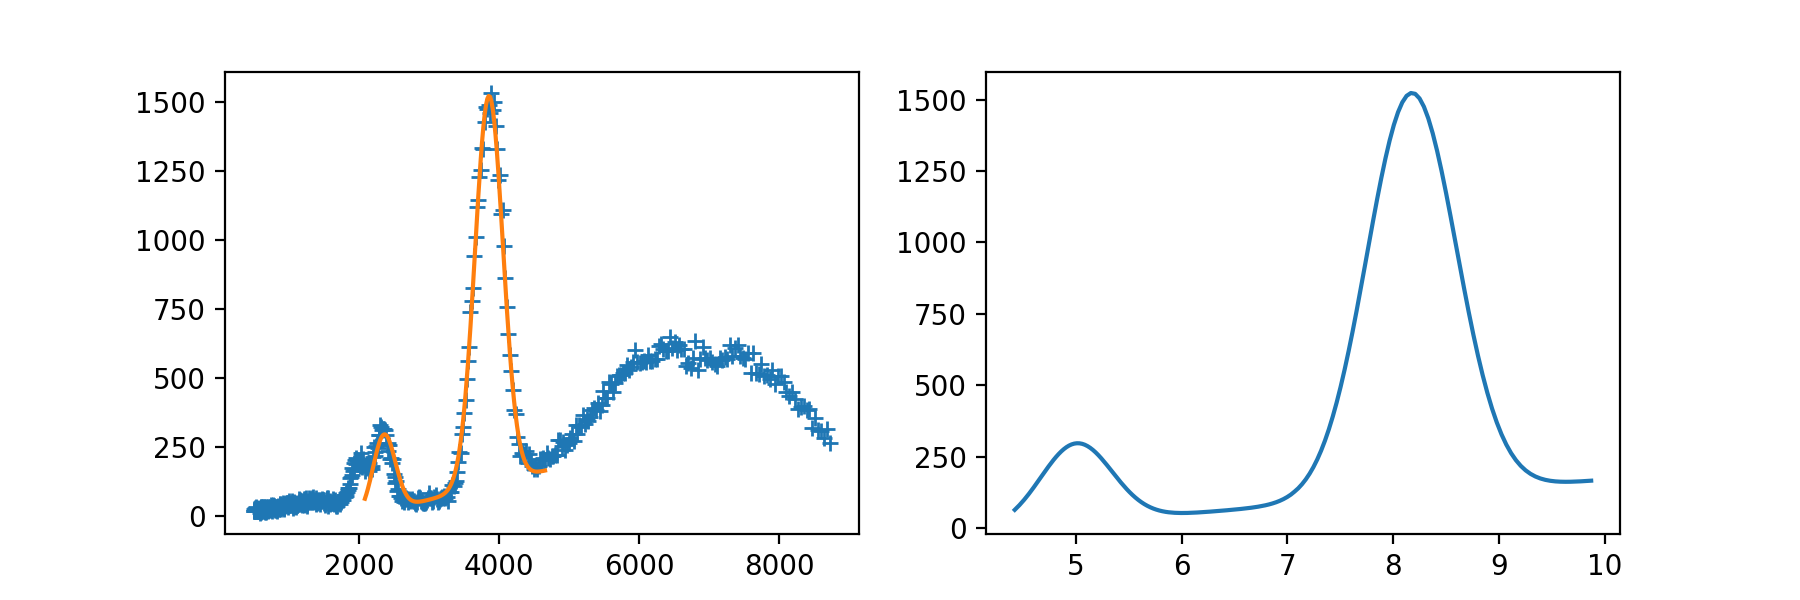

CPU times: user 308 ms, sys: 33.9 ms, total: 342 ms
Wall time: 295 ms


In [57]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(30)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

In [59]:
%%time
C60_difc, C60_mask = gpd()

- Working on pixel 0
.* Not enough counts: 0
* fit failed: pixel 0
.* Not enough counts: 1
* fit failed: pixel 1
.* Not enough counts: 2
* fit failed: pixel 2
.* Not enough counts: 3
* fit failed: pixel 3
.* Not enough counts: 4
* fit failed: pixel 4
.* Not enough counts: 5
* fit failed: pixel 5
.* Not enough counts: 6
* fit failed: pixel 6
.* Not enough counts: 7
* fit failed: pixel 7
.* Not enough counts: 8
* fit failed: pixel 8
.* Not enough counts: 9
* fit failed: pixel 9
.* Not enough counts: 10
* fit failed: pixel 10
.* Not enough counts: 11
* fit failed: pixel 11
.* Not enough counts: 12
* fit failed: pixel 12
.* Not enough counts: 13
* fit failed: pixel 13
.* Not enough counts: 14
* fit failed: pixel 14
.* Not enough counts: 15
* fit failed: pixel 15
.* Not enough counts: 16
* fit failed: pixel 16
.* Not enough counts: 17
* fit failed: pixel 17
.* Not enough counts: 18
* fit failed: pixel 18
.* Not enough counts: 19
* fit failed: pixel 19
.* Not enough counts: 20
* fit failed: 

.* Not enough counts: 512
* fit failed: pixel 512
.* Not enough counts: 513
* fit failed: pixel 513
.* Not enough counts: 514
* fit failed: pixel 514
.* Not enough counts: 515
* fit failed: pixel 515
.* Not enough counts: 516
* fit failed: pixel 516
.* Not enough counts: 517
* fit failed: pixel 517
.* Not enough counts: 518
* fit failed: pixel 518
.* Not enough counts: 519
* fit failed: pixel 519
.* Not enough counts: 520
* fit failed: pixel 520
.* Not enough counts: 521
* fit failed: pixel 521
.* Not enough counts: 522
* fit failed: pixel 522
.* Not enough counts: 523
* fit failed: pixel 523
.* Not enough counts: 524
* fit failed: pixel 524
.* Not enough counts: 525
* fit failed: pixel 525
.* Not enough counts: 526
* fit failed: pixel 526
.* Not enough counts: 527
* fit failed: pixel 527
.* Not enough counts: 528
* fit failed: pixel 528
.* Not enough counts: 529
* fit failed: pixel 529
.* Not enough counts: 530
* fit failed: pixel 530
.* Not enough counts: 531
* fit failed: pixel 531


.* Not enough counts: 914
* fit failed: pixel 914
.* Not enough counts: 915
* fit failed: pixel 915
.* Not enough counts: 916
* fit failed: pixel 916
.* Not enough counts: 917
* fit failed: pixel 917
.* Not enough counts: 918
* fit failed: pixel 918
.* Not enough counts: 919
* fit failed: pixel 919
.* Not enough counts: 920
* fit failed: pixel 920
.* Not enough counts: 921
* fit failed: pixel 921
.* Not enough counts: 922
* fit failed: pixel 922
.* Not enough counts: 923
* fit failed: pixel 923
.* Not enough counts: 924
* fit failed: pixel 924
.* Not enough counts: 925
* fit failed: pixel 925
.* Not enough counts: 926
* fit failed: pixel 926
.* Not enough counts: 927
* fit failed: pixel 927
.* Not enough counts: 928
* fit failed: pixel 928
.* Not enough counts: 929
* fit failed: pixel 929
.* Not enough counts: 930
* fit failed: pixel 930
.* Not enough counts: 931
* fit failed: pixel 931
.* Not enough counts: 932
* fit failed: pixel 932
.* Not enough counts: 933
* fit failed: pixel 933


<IPython.core.display.Javascript object>


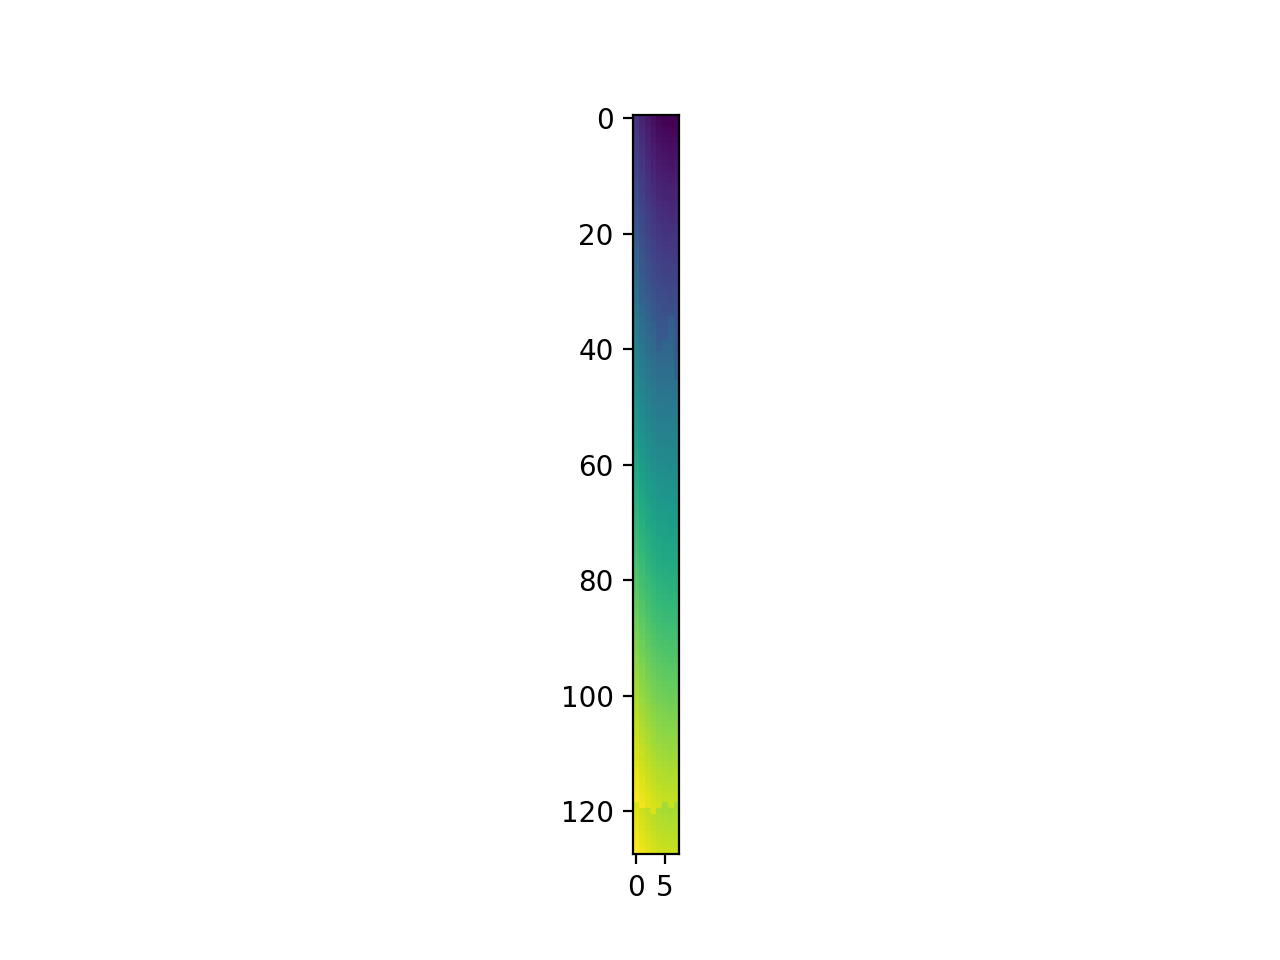

In [68]:
view = C60_difc.view()
view.shape = 8, 128
plt.figure()
plt.imshow(view.T)

In [61]:
np.save(os.path.join(I_tof_dir, 'difc-%s.npy' % packname), C60_difc)
np.save(os.path.join(I_tof_dir, 'mask-%s.npy' % packname), C60_mask)

In [69]:
I_tof_dir = 'C60-I_tof' 
!ls {I_tof_dir}/*-{packname}.npy

C60-I_tof/difc-C25T.npy  C60-I_tof/I_tof-y-C25T.npy  C60-I_tof/mask-C25T.npy


# Align

In [130]:
alignment = align.Align('./C60-I_tof')
alignment.options['Xposition'] = (-.02, .02)
alignment.options['Yposition'] = (-.02, .02)

In [131]:
alignment.load_L2_from_nxs('./L2table.nxs')

(array([-1.        , -1.        , -1.        , ...,  5.68382549,
         5.69823694,  5.67509985]),
 array([ True,  True,  True, ..., False, False, False], dtype=bool))

In [132]:
%%time
result = alignment.align(C60_difc, C60_mask, packname, ofile=open('new-%s.xml' % packname, 'wt'))

2017-12-04 22:16:29,908 - Align component - INFO - Working on init_IDF.xml/C row/C25T/eightpack-top. Starting position is [0.06600619612, 0.431673, 5.50764222828], Starting rotation is [-178.16963756000004, 0.0, -0.0]
2017-12-04 22:16:29,908 - Align component - INFO - Working on init_IDF.xml/C row/C25T/eightpack-top. Starting position is [0.06600619612, 0.431673, 5.50764222828], Starting rotation is [-178.16963756000004, 0.0, -0.0]
2017-12-04 22:16:29,908 - Align component - INFO - Working on init_IDF.xml/C row/C25T/eightpack-top. Starting position is [0.06600619612, 0.431673, 5.50764222828], Starting rotation is [-178.16963756000004, 0.0, -0.0]
2017-12-04 22:16:29,908 - Align component - INFO - Working on init_IDF.xml/C row/C25T/eightpack-top. Starting position is [0.06600619612, 0.431673, 5.50764222828], Starting rotation is [-178.16963756000004, 0.0, -0.0]
2017-12-04 22:16:29,908 - Align component - INFO - Working on init_IDF.xml/C row/C25T/eightpack-top. Starting position is [0.066

- Working on C25T
- pack params: [0.06600619612, 0.431673, 5.50764222828, -178.16963756000004, 0.0, -0.0]
* initial parameters:  [0.06600619612, 0.431673, 5.50764222828, -178.16963756000004, 0.0, -0.0]


2017-12-04 22:17:06,795 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C25T/eightpack-top. Final position is [0.059593459686449766, 0.44539715327186263, 5.50592666530042], Final rotation is [-178.16964170377386, 0.0, 0.0]
2017-12-04 22:17:06,795 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C25T/eightpack-top. Final position is [0.059593459686449766, 0.44539715327186263, 5.50592666530042], Final rotation is [-178.16964170377386, 0.0, 0.0]
2017-12-04 22:17:06,795 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C25T/eightpack-top. Final position is [0.059593459686449766, 0.44539715327186263, 5.50592666530042], Final rotation is [-178.16964170377386, 0.0, 0.0]
2017-12-04 22:17:06,795 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C25T/eightpack-top. Final position is [0.059593459686449766, 0.44539715327186263, 5.50592666530042], Final rotation is [-178.16964170377386, 0.0, 0.0]
2017-12-04 22:17:06,795 - Align comp

- Estimate: (0.12583904594462827, 0.431673, 5.5074919569329888)
- New: [0.059593459686449766, 0.44539715327186263, 5.50592666530042, -178.16964170377386, 0.0, 0.0]

  <type name="C25T">
    <component type="eightpack-top">
      <location x="0.05959346" y="0.44539715" z="5.50592667">
         <rot axis-z="0" axis-x="0" axis-y="1" val="-178.16964170"/>
      </location>
    </component>
  </type>

CPU times: user 37.8 s, sys: 184 ms, total: 38 s
Wall time: 37.6 s


In [133]:
new_params, fit = result

In [134]:
fit.options

OrderedDict([('Xposition', (-0.02, 0.02)),
             ('Yposition', (-0.02, 0.02)),
             ('Zposition', (-0.3, 0.3)),
             ('AlphaRotation', (-2.0, 2.0)),
             ('BetaRotation', False),
             ('GammaRotation', False)])

In [127]:
fit.cost([0.11326686170572708, 5.508410917878781, -179.42879915103185])

0.00022539444183761981

In [128]:
fit.cost([0.06600619612, 5.50764222828, -178.16963756000004])

0.000495214006710285